In [2]:
library(raster)
require(ncdf4)

Loading required package: sp

Loading required package: ncdf4



In [3]:
file <- "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/Land_use/multiple-states_input4MIPs_landState_Scenario-ssp585-2-1-f_gn_2015-2100.nc"
lu_cmip <- terra::rast(file)
lu_cmip
names(nc_open(file)[["var"]])

class       : SpatRaster 
dimensions  : 720, 1440, 1204  (nrow, ncol, nlyr)
resolution  : 0.25, 0.25  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 
sources     : multiple-states_input4MIPs_landState_Scenario-ssp585-2-1-f_gn_2015-2100.nc:primf  (86 layers) 
              multiple-states_input4MIPs_landState_Scenario-ssp585-2-1-f_gn_2015-2100.nc:primn  (86 layers) 
              multiple-states_input4MIPs_landState_Scenario-ssp585-2-1-f_gn_2015-2100.nc:secdf  (86 layers) 
              ... and 11 more source(s)
varnames    : primf (forested primary land) 
              primn (non-forested primary land) 
              secdf (potentially forested secondary land) 
              ...
names       : primf_1, primf_2, primf_3, primf_4, primf_5, primf_6, ... 
unit        :       1,       1,       1,       1,       1,       1, ... 
time (years): 2015 to 2100 

[1] "primf"      "primn"      "secdf"      "secdn"      "urban"     
 [6] "c3ann"      "c4ann"      "c3per"      "c4per"      "c3nfx"     
[11] "pastr"      "range"      "secmb"      "secma"      "lat_bounds"
[16] "lon_bounds" "time_bnds"

###  Details of states:
 - primf: forested primary land
 - primn: non-forested primary land \n
 - secdf: potentially forested secondary land \n
 - secdn: potentially non-forested secondary land \n
 - pastr: managed pasture \n
 - range: rangeland \n
 - urban: urban land \n
 - c3ann: C3 annual crops \n
 - c3per: C3 perennial crops \n
 - c4ann: C4 annual crops \n
 - c4per: C4 perennial crops \n
 - c3nfx: C3 nitrogen-fixing crops \n
 - secma: secondary mean age (units: years) \n
 - secmb: secondary mean biomass density (units: kg C/m^2)

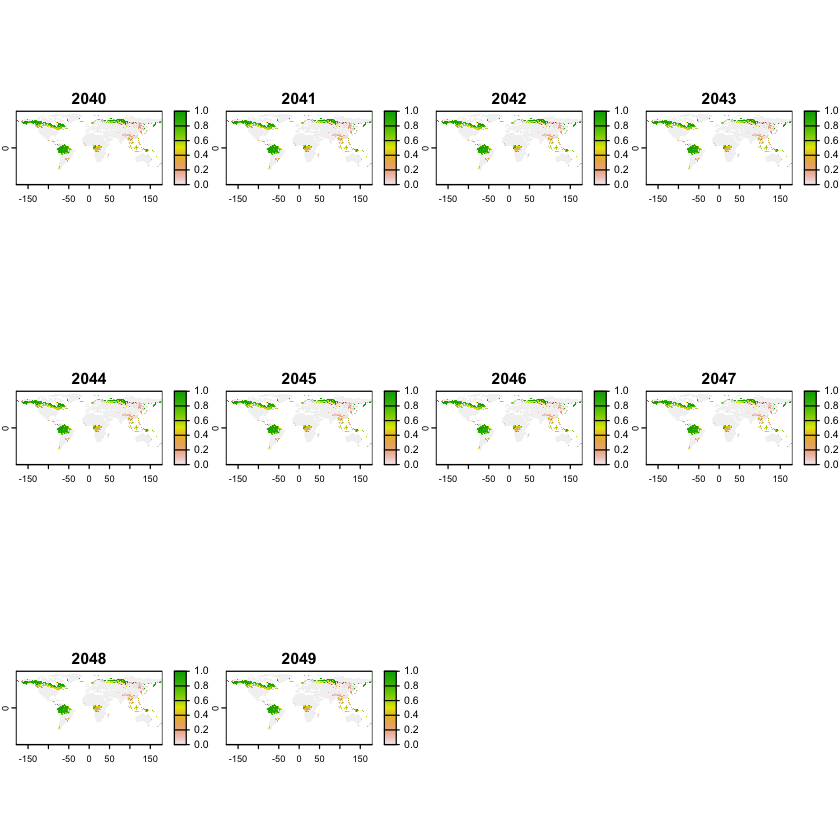

In [4]:
plot(lu_cmip[[26:35]])

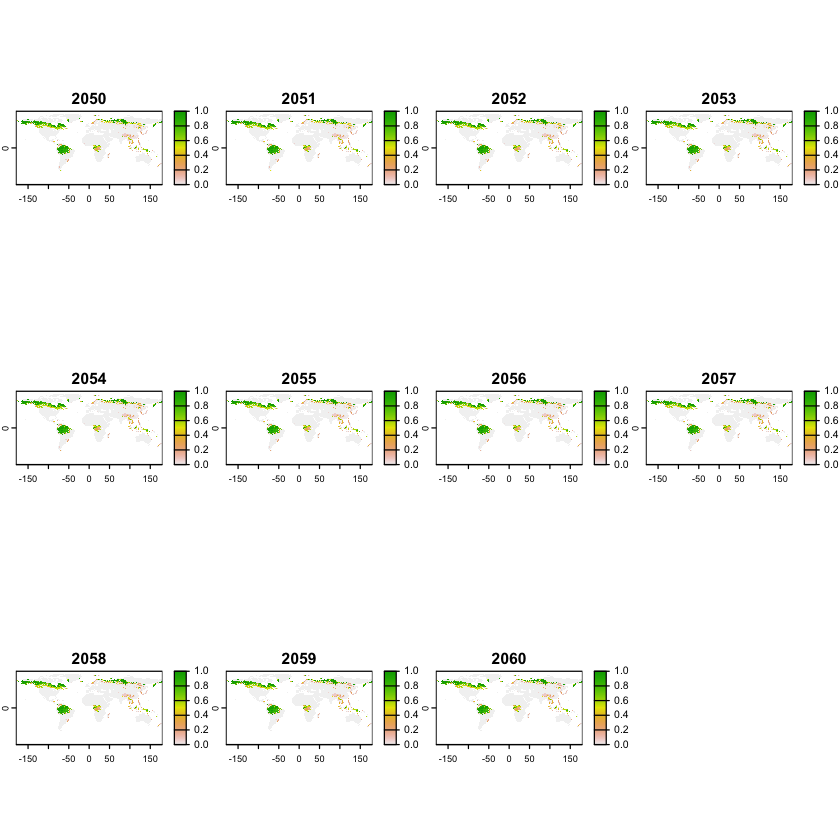

In [5]:
plot(lu_cmip[[36:46]])

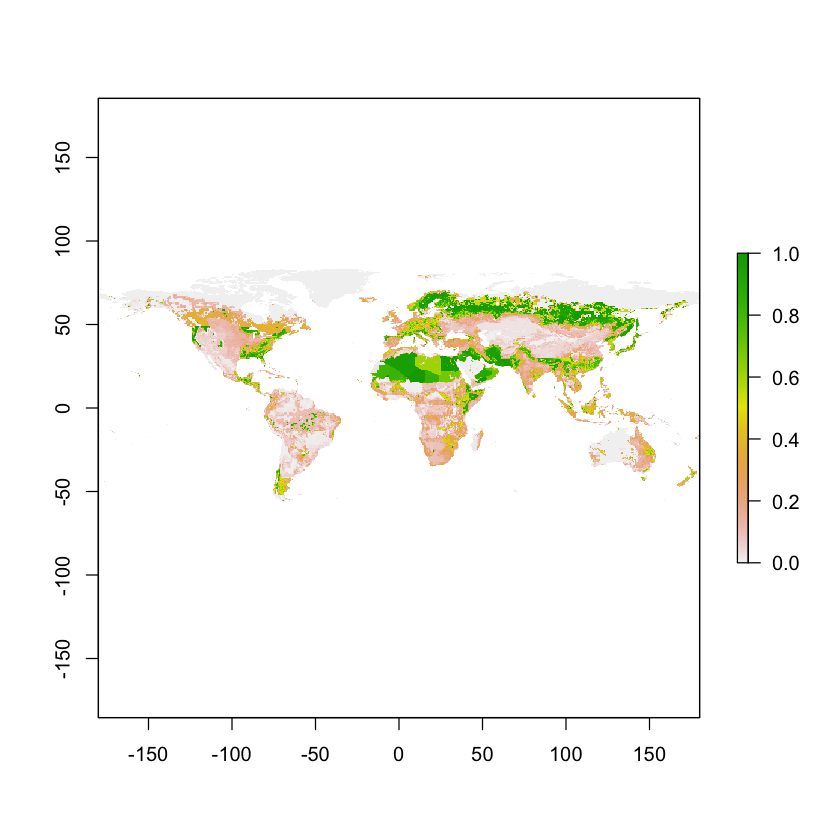

In [6]:
lu_secd <- brick(file, varname = "secdf")
lu_secd <- lu_secd[[26:46]]
lu_secdf <- calc(lu_secd, mean)

lu_secd <- brick(file, varname = "secdn")
lu_secd <- lu_secd[[26:46]]
lu_secdn <- calc(lu_secd, mean)

lu_secd <- lu_secdf + lu_secdn
plot(lu_secd)



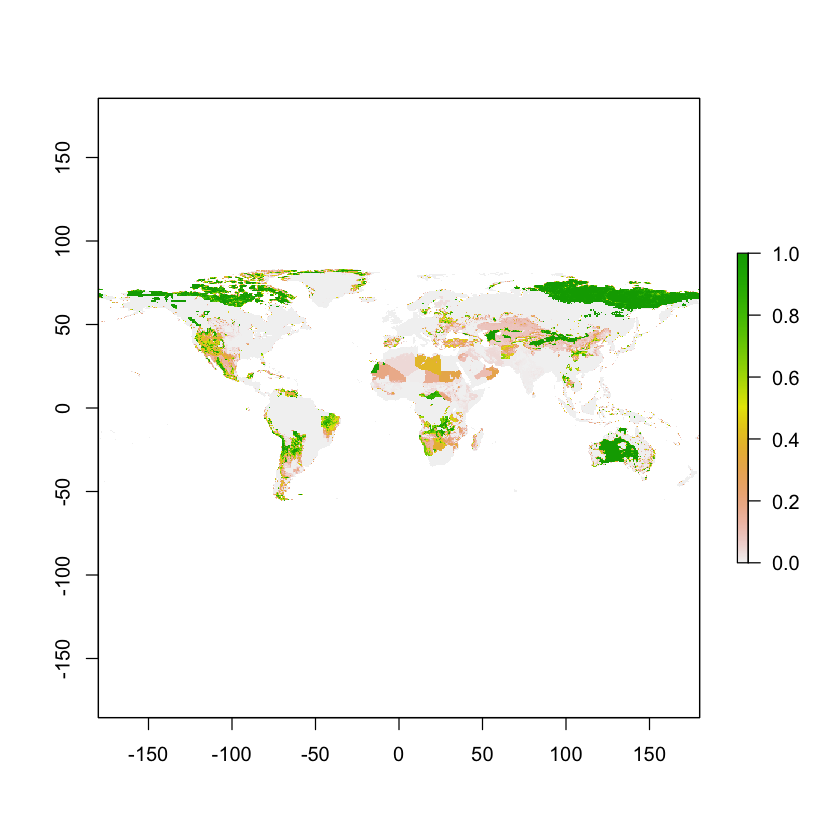

In [7]:
lu_prim <- brick(file, varname = "primf")
lu_prim <- lu_prim[[26:46]]
lu_primf <- calc(lu_prim, mean)

lu_prim <- brick(file, varname = "primn")
lu_prim <- lu_prim[[26:46]]
lu_primn <- calc(lu_prim, mean)

lu_prim <- lu_primf + lu_primn
plot(lu_primn)



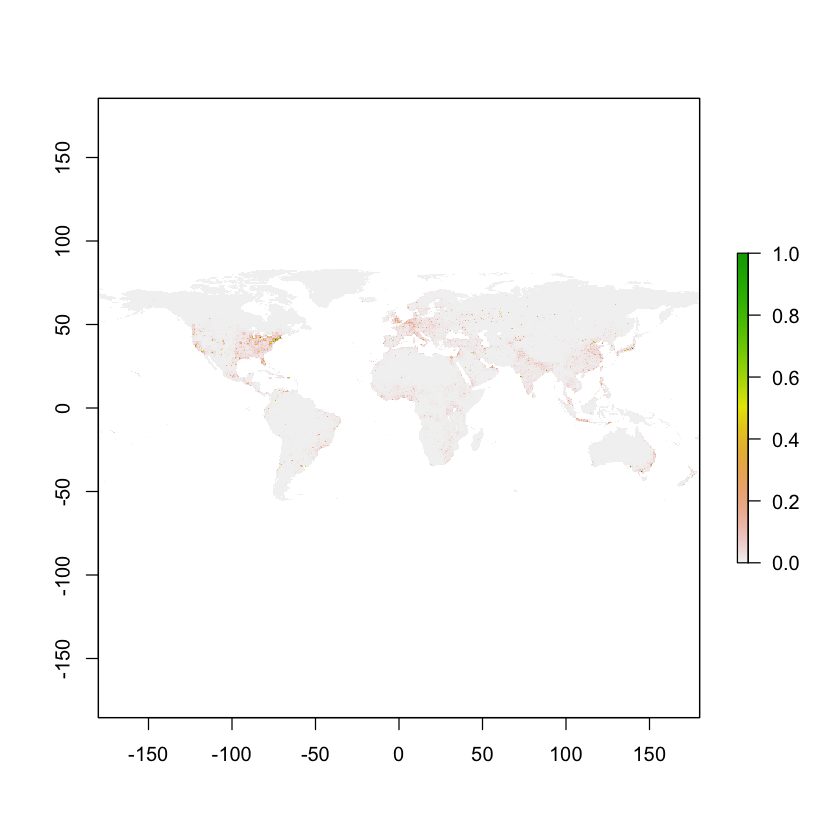

In [8]:
lu_urbn <- brick(file, varname = "urban")
lu_urbn <- lu_urbn[[26:46]]
lu_urbn <- calc(lu_urbn, mean)
plot(lu_urbn)



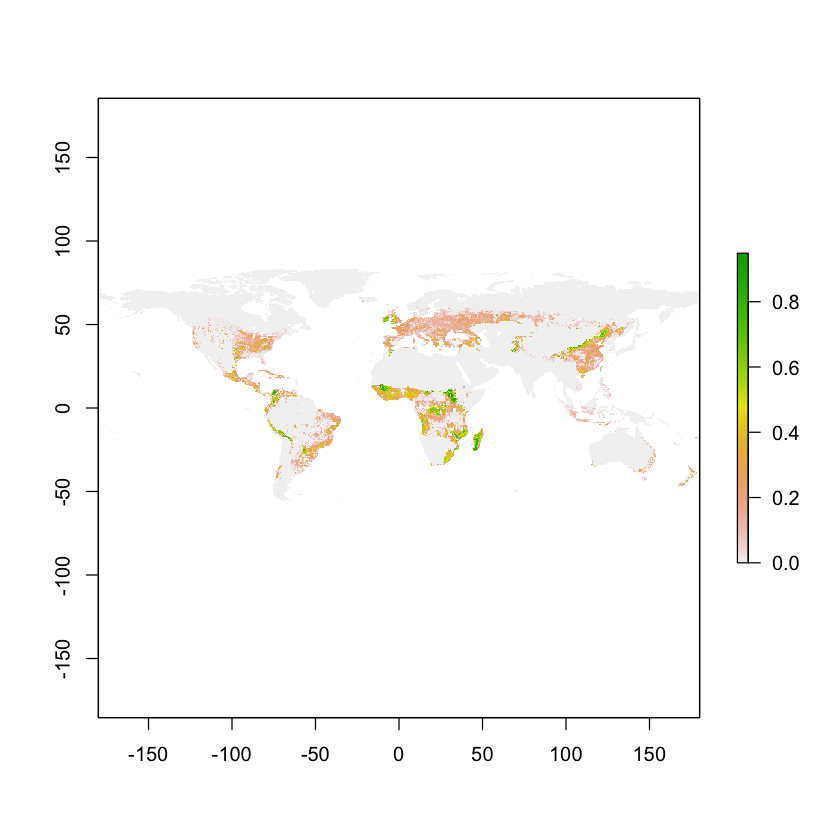

In [9]:
lu_pastr <- brick(file, varname = "pastr")
lu_pastr <- lu_pastr[[26:46]]
lu_pastr <- calc(lu_pastr, mean)
plot(lu_pastr)



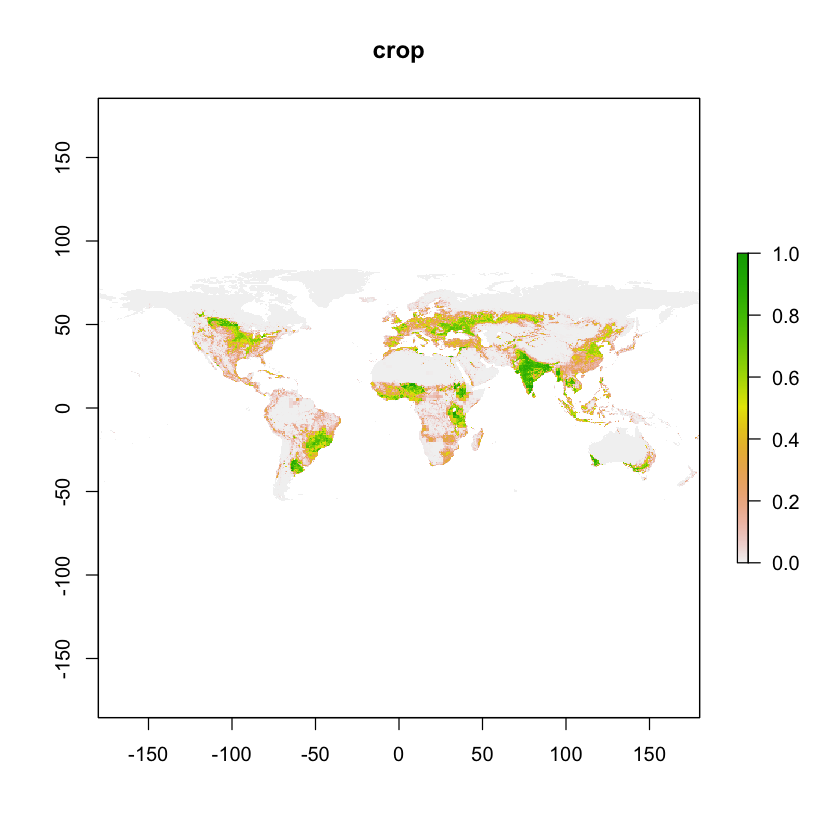

In [10]:
lu_c3 <- brick(file, varname = "c3ann")
lu_c3 <- lu_c3[[26:46]]
lu_c3ann <- calc(lu_c3, mean)

lu_c3 <- brick(file, varname = "c3per")
lu_c3 <- lu_c3[[26:46]]
lu_c3per <- calc(lu_c3, mean)

lu_c3 <- brick(file, varname = "c4per")
lu_c3 <- lu_c3[[26:46]]
lu_c4per <- calc(lu_c3, mean)

lu_c3 <- brick(file, varname = "c4ann")
lu_c3 <- lu_c3[[26:46]]
lu_c4ann <- calc(lu_c3, mean)

lu_c3 <- brick(file, varname = "c3nfx")
lu_c3 <- lu_c3[[26:46]]
lu_c3nfx <- calc(lu_c3, mean)

lu_crop <- lu_c3ann + lu_c3nfx + lu_c3per + lu_c4ann + lu_c4per
plot(lu_crop, main = "crop")

In [11]:
writeRaster(lu_prim, "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/CMIP6_raw/ssp5_lu_othr_2040-2060.tif")
writeRaster(lu_secd, "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/CMIP6_raw/ssp5_lu_secd_2040-2060.tif")
writeRaster(lu_urbn, "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/CMIP6_raw/ssp5_lu_urbn_2040-2060.tif")
writeRaster(lu_pastr, "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/CMIP6_raw/ssp5_lu_past_2040-2060.tif")
writeRaster(lu_crop, "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Data/Input/Raw/CMIP6_raw/ssp5_lu_crop_2040-2060.tif")